# Linear Regression Scratch Assignment
- In this assignment we will create a linear regression class from scratch. We will implement algorithm using only the minimum library such as Numpy.
- We will use the following template

```
class ScratchLinearRegression():
   def __init__(self,num_iter,lr,no_bias,verbose):
       self.iter = num_iter
       self.lr = lr
       self.no_bias = no _bias
       self.verbose = verbose
       self.loss = np.zeros(self.iter)
       self.val_loss = np.zeros(self.iter)
       
   def fit(self, X, y, X_val=None, y_val=None):
       if self.verbose:
           print()
       pass
       
   def predict(self, X):
       pass
       
   
```

## Problem 1: Hypothetical function
- Implement linear regression assumption function given the following formula:
$$
h_{i}{x} = i_{0}x_{0} + i_{1}x_{1} +......+i_{j}x_{j}+......+i_{n}x_{n} (x_{0} = 1)
$$

$x$ : feature vector 

$i$ : theta-parameter vector

$n$ : number of features

$x_{j}$ : j-th feature

$i_{j}$ : j-th parameter(weight)

- Expressed in vector format   
$h_{i}{x} = i^T.x$

- In the vector format above we can use dot product on theta transpose and x variable to calculate y_predicted $ y_pred = X @ theta$

In [ ]:
def _linear_hypothesis(self, X): # the underscore is because the method cant be called from the class
    y_pred = X @ self.theta # @ means dot product 
    return y_pred

## Question 2: The Steepest Descent Method
- Here we Implement learning by the steepest descent method. Add the parameter update formula method _gradient_descent represented by the following formula and call it from the fit method.
$$
i_{j} = i_{j} - a\frac{1}{m}\sum_{i=1}^{m}[(h_{i}(x^{i}) - y^{i})x_{j}^{i}]
$$

$a$ : learning rate(lr)

$i$ : sample index

$j$ : feature index

In [ ]:
def _gradient_descent(self, X, y):
    m = X.shape[0] # the number of samples
    n = X.shape[1] # the number of features
    y_pred = self.linear_hypothesis(X) # y_pred calculated by linear hypothesis function
    for j in range(n):  # looping n times (n is the number of features)
        gradient = 0 # initialize gradient every time you go to next feature
        for i in range(m): # looping m times (m is the number of samples)
            gradient += (pred[i] - y[i]) * X[i,j] # sum of gradients for m samples
        self.theta[j] = self.theta[j] - self.lr * (gradient / m) # update theta 

## Question 3: Presumption
- Use the predict function to estimate

In [ ]:
def predict(self, X):
    if self.bias == True: # if there is a bias value
        bias = np.ones(X.shape[0].reshape(X.shape[0],1)) # create an array of ones with no. of samples as rows and one column
        X = np.hstack([bias, X]) # stack bias array with X horizontally
    y_pred = self._linear_hypothesis(X) # call y_pred from linear hypothesis function using X as input
    return y_pred

## Question 4: Mean Squared Error
- Here we create a function for the mean square error (MSE) to be used as an index value for linear regression.
- The mean squared error is given by the following formula:
$$
L_{(i)} = \frac{1}{m}\sum_{i=1}^{m}(h_{i}(x^{(i)}) - y^{(i)})^2
$$

$m$ : number of input data

$h_{i}$ : (h theta) hypothetical function

$x^{(i)}$ : feature vector of i-th sample

$y^{(i)}$ : correct value of i-th sample

In [ ]:
def MSE(y_pred, y):
    mse = ((y_pred - y) ** 2).sum() / X.shape[0] # mean squared error formula
    return mse
    

## Question 5: Objective Function
- Here we implement the linear regression objective function(loss function) expressed by the following formula: 

$J_{(i)}$ : objective function(loss function)

$$
J_{(i)} = \frac{1}{2m}\sum_{i=1}^{m}(h_{i}(x^{(i)}) - y^{(i)})^2
$$
$m$ : number of input data

$h_{i}$ : hypothetical function(h theta)

$x^{(i)}$ : feature vector of i-th sample

$y^{(i)}$ : correct value of i-th sample

- Loss function/objective function can also be expressed as $\frac{MSE}{2}$ where MSE is the mean squared error

In [ ]:
def _loss_func(self,y_pred, y):# receives predicted value y_pred and the correct value y as arguments 
    loss = self.MSE(y_pred, y)/2
    return loss

## Question 6: Learning and Estimation
- Learn and infer a scratch implementation against the data from the House Prices competition that you prepared in the Machine Learning Scratch Introductory Sprint. Compare it with the scikit-learn implementation to see if it works.

- To implement the code we will copy the functions and build one single code with ```class ScratchLinearRegression():```

In [1]:
class ScratchLinearRegression():
    def __init__(self, num_iter, lr, no_bias, verbose):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.theta = np.array([])
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        if self.no_bias == False:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
            y_pred = self._linear_hypothesis(X)
            pred_val = self._linear_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(y_pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}The learning loss for the first round is{}'.format(i,loss))
   
    
    def _linear_hypothesis(self, X): # the underscore is because the method cant be called from the class
        y_pred = X @ self.theta # @ means dot product 
        return y_pred
    
    def _gradient_descent(self, X, y):
        m = X.shape[0] # the number of samples
        n = X.shape[1] # the number of features
        y_pred = self._linear_hypothesis(X) # y_pred calculated by linear hypothesis function
        for j in range(n):  # looping n times (n is the number of features)
            gradient = 0 # initialize gradient every time you go to next feature
            for i in range(m): # looping m times (m is the number of samples)
                gradient += (y_pred[i] - y[i]) * X[i,j] # sum of gradients for m samples
                self.theta[j] = self.theta[j] - self.lr * (gradient / m) # update theta 
    
    def predict(self, X):
        if self.no_bias == False: # if there is a bias value
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1) # create an array of ones with no. of samples as rows and one column
            X = np.hstack([bias, X]) # stack bias array with X horizontally
        y_pred = self._linear_hypothesis(X) # call y_pred from linear hypothesis function using X as input
        return y_pred
    
    def MSE(self, y_pred, y):
        mse = ((y_pred - y) ** 2).sum() / X.shape[0] # mean squared error formula
        return mse
    
    def _loss_func(self,y_pred, y):# receives predicted value y_pred and the correct value y as arguments 
        loss = self.MSE(y_pred, y)/2
        return loss
     
    
    

In [2]:
# importing the house price dataset and preparing it
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [3]:
#initializing the class and fitting the data
slr = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=False, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0The learning loss for the first round is15868658539.420206
1The learning loss for the first round is1.890556143899476e+25
2The learning loss for the first round is2.5472519621129833e+40
3The learning loss for the first round is3.433076059855458e+55
4The learning loss for the first round is4.626983449893469e+70
5The learning loss for the first round is6.236092386942701e+85
6The learning loss for the first round is8.404795228274863e+100
7The learning loss for the first round is1.1327699856468486e+116
8The learning loss for the first round is1.5267092243590466e+131
9The learning loss for the first round is2.0576472587346625e+146


In [4]:
print(slr.loss)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.58686585e+010 1.89055614e+025
 2.54725196e+040 3.43307606e+055 4.62698345e+070 6.23609239e+085
 8.40479523e+100 1.13276999e+116 1.52670922e+131 2.05764726e+146]


In [5]:
mse = sum(slr.loss)*2 # since mean square error = loss func * 2
mse

4.115294517469328e+146

In [6]:
ypreds = slr.predict(X_test)# ypreds - y predicted from scratch implementation
ypreds[:5]

array([[-9.28724913e+80],
       [-8.40488869e+80],
       [-7.74651266e+80],
       [-8.43702670e+80],
       [-8.89874513e+80]])

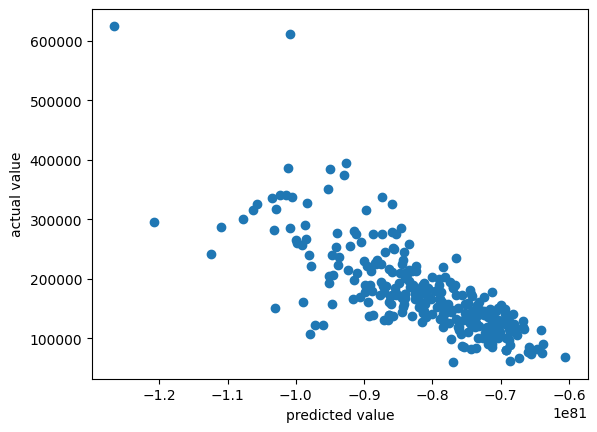

In [7]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.scatter(ypreds, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

### NOTE: 
- From the above results the y_predicted is negative instead of positive, the gradient of line of best fit is negative and clearly predicted results are wrong.
- If we increase the learning rate significantly and increase number of iterations the results become positive

In [27]:
slr = ScratchLinearRegression(num_iter=100, lr=0.00000000001, no_bias=False, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0The learning loss for the first round is15868658539.420206
1The learning loss for the first round is14850723238.460733
2The learning loss for the first round is13905883170.982224
3The learning loss for the first round is13028878470.715961
4The learning loss for the first round is12214828064.052874
5The learning loss for the first round is11459202380.079994
6The learning loss for the first round is10757798027.123045
7The learning loss for the first round is10106714294.07382
8The learning loss for the first round is9502331344.995235
9The learning loss for the first round is8941289984.974716
10The learning loss for the first round is8420472883.991484
11The learning loss for the first round is7936987153.724248
12The learning loss for the first round is7488148179.798559
13The learning loss for the first round is7071464618.999867
14The learning loss for the first round is6684624477.499011
15The learning loss for the first round is6325482192.187524
16The learning loss for the first round is5

In [14]:
ypreds = slr.predict(X_test)# ypreds - y predicted from scratch implementation
ypreds[:5]

array([[206268.90245509],
       [184377.44058252],
       [168163.59787566],
       [185438.50773607],
       [196335.82290415]])

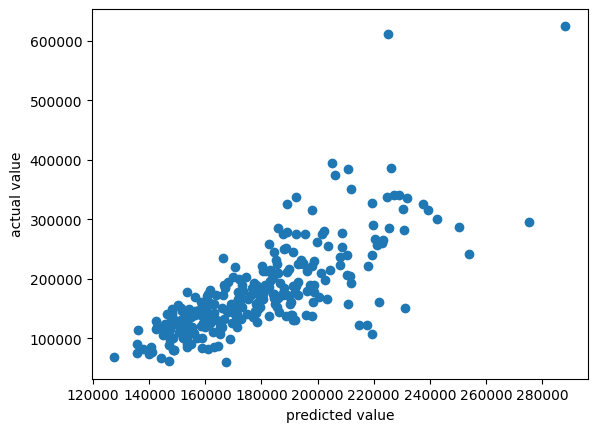

In [15]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.scatter(ypreds, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

- As you can see from the above graph the results seem more clear now after increasing number of iterations and learning rate

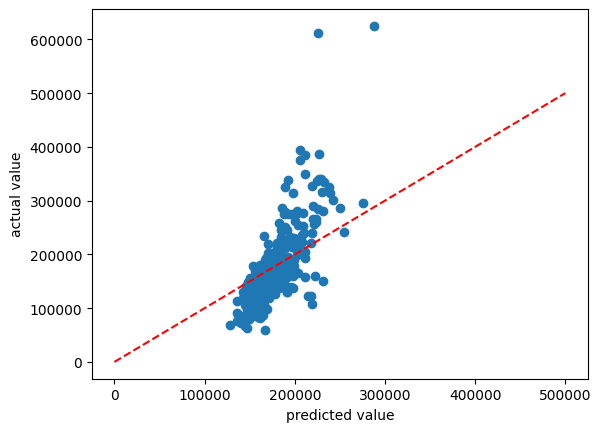

In [20]:
#By drawing a straight line on this scatterplot you can try to visually understand how reliable the predictions are.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(ypreds, y_test)
ax.plot((0, 500000), (0, 500000), linestyle='dashed', color='red') # setting to 500000 on both scratch implementation and scikit learn
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

- The clustering together of data like a ball shows the data is overfitted, the model has not done well to predict the data

#### Implementing the same data with scikit learn and comparing the results

In [21]:
# implementing using scikit learn and comparing the results
# 1st feature normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)


StandardScaler()


In [22]:
X_train_scaled = scaler.transform(X_train ) #assign standardized variables to X_train_scaled
X_test_scaled = scaler.transform(X_test)#assign standardized variables to X_test_scaled

In [23]:

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train_scaled,y_train)

LinearRegression()

In [24]:
y_predl = LinReg.predict(X_test_scaled) # y_preds - y predicted from scikit learn
y_predl[:5]

array([[223051.59585922],
       [211808.25192745],
       [192493.4479772 ],
       [188314.75564564],
       [244771.53812111]])

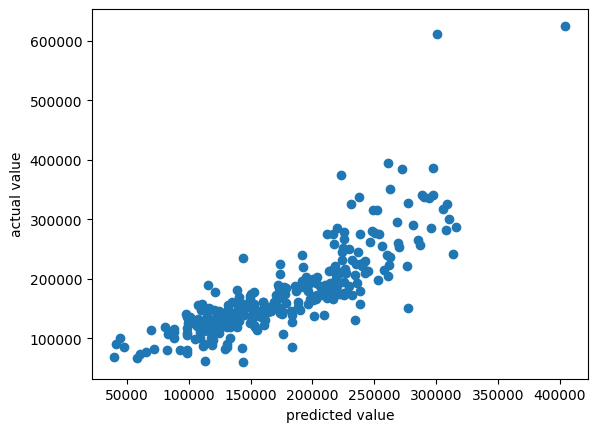

In [25]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.scatter(y_predl, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

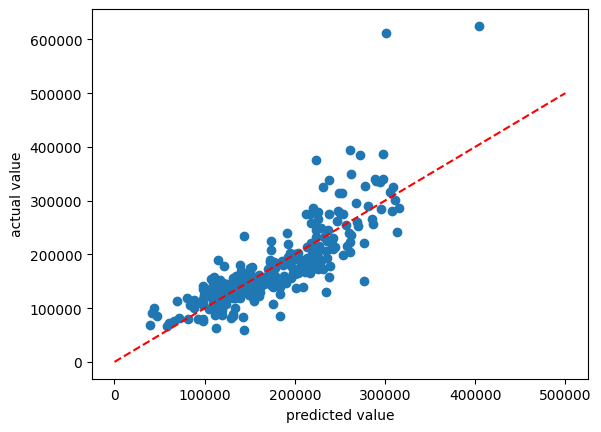

In [26]:
#By drawing a straight line on this scatterplot you can try to visually understand how reliable the predictions are.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_predl, y_test)
ax.plot((0, 500000), (0, 500000), linestyle='dashed', color='red') # setting to 500000 on both scratch implementation and scikit learn
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

#### Scikit learn is more accurate in predicting the results as shown in the graph above

# Question 7: Learning Curve Plot
- A function that displays the learning curve to see if the loss is dropping properly.

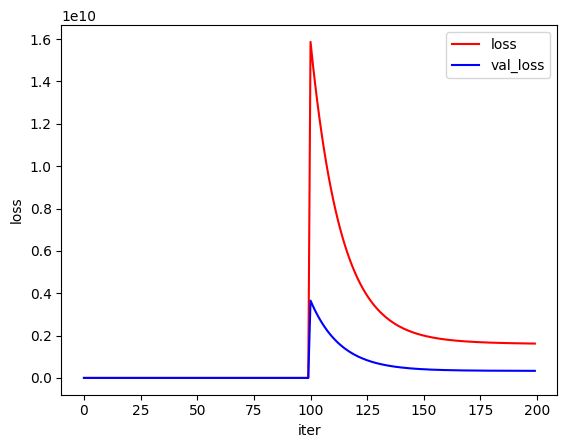

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss, color = 'red', label = 'loss')
plt.plot(slr.val_loss, color = 'blue', label = 'val_loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()

## Problem 8: (Advanced Exercise) Removal of Bias Term
- Verify how learning changes when bias term is removed. Also consider and investigate the role of bias terms in linear regression models.

In [36]:
# set the value no_bias to true - that way the bias term is removed
slr = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0The learning loss for the first round is15868658539.420206
1The learning loss for the first round is1.8905555686337287e+25
2The learning loss for the first round is2.5472503892390815e+40
3The learning loss for the first round is3.433072864726771e+55
4The learning loss for the first round is4.626977694385846e+70
5The learning loss for the first round is6.236082676652134e+85
6The learning loss for the first round is8.404779508600768e+100
7The learning loss for the first round is1.1327675122065927e+116
8The learning loss for the first round is1.526705412558266e+131
9The learning loss for the first round is2.0576414768415066e+146


In [37]:
ypreds = slr.predict(X_test)# ypreds - y predicted from scratch implementation
ypreds[:5]

array([[-9.28723477e+80],
       [-8.40487556e+80],
       [-7.74650046e+80],
       [-8.43701353e+80],
       [-8.89873131e+80]])

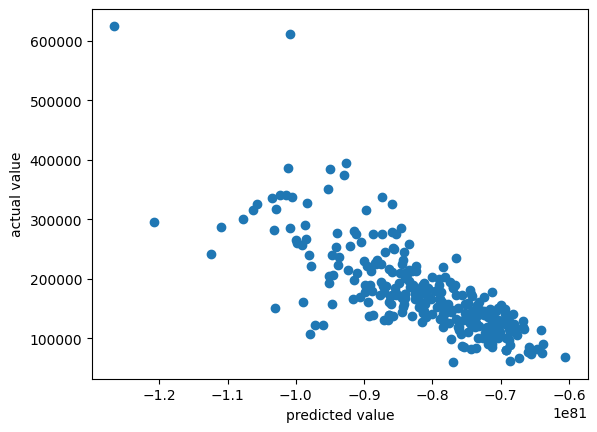

In [38]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.scatter(ypreds, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

- As we can see from the graph above removing the data does not seem to affect the data

- No, removing bias does not affect the data in linear regression. The bias term, also known as the intercept term, represents the value of the target variable when all predictor variables are 0. If you don't include a bias term, it's assumed that the model always goes through the origin. Whether you include a bias term or not depends on the specific problem you're trying to solve, but excluding it would not affect the data.





### Problem 9: (Advanced Problem) Multi - dimensional           feature quantity

- How the learning result changes when the squared or cubic of the feature value(X) is used as the input. $ x^2 $ or $ x^3$


In [41]:
# first lets use square x = x^2
# importing the house price dataset and preparing it
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
X = X ** 2
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [42]:
slr = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=False, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0The learning loss for the first round is15689076402.118835
1The learning loss for the first round is2.5789078040053895e+38
2The learning loss for the first round is4.789131897469893e+66
3The learning loss for the first round is8.893461795598361e+94
4The learning loss for the first round is1.6515207967159717e+123
5The learning loss for the first round is3.066882576159494e+151
6The learning loss for the first round is5.695216486584195e+179
7The learning loss for the first round is1.057604584216484e+208
8The learning loss for the first round is1.9639770651876404e+236
9The learning loss for the first round is3.647115349114942e+264


In [43]:
ypreds = slr.predict(X_test)# ypreds - y predicted from scratch implementation
ypreds[:5]

array([[-3.82298932e+146],
       [-2.72341848e+146],
       [-3.98464598e+146],
       [-3.17932330e+146],
       [-3.51202156e+146]])

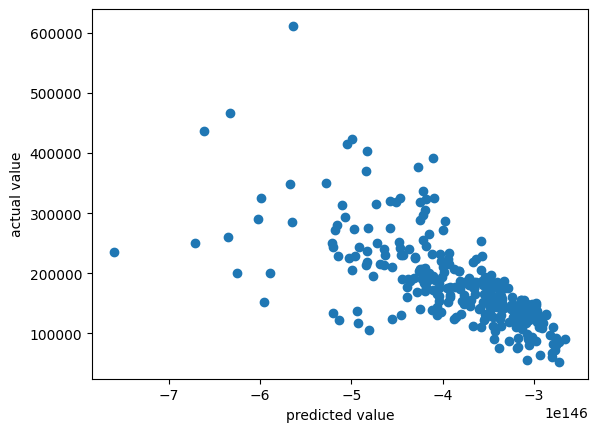

In [44]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.scatter(ypreds, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

- From the above graph and y_pred values there is a difference in y_pred values from $ x^2 $ and x as input features

In [53]:
# Using x^3 we get
# importing the house price dataset and preparing it
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
X = X ** 3
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [54]:
slr = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=False, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0The learning loss for the first round is15586624621.780136
1The learning loss for the first round is4.6278582809150176e+51
2The learning loss for the first round is1.715953248993128e+93
3The learning loss for the first round is6.3757839845345555e+134
4The learning loss for the first round is2.3648496495438464e+176
5The learning loss for the first round is8.765618534793468e+217
6The learning loss for the first round is3.248433618315179e+259
7The learning loss for the first round is1.2037613981704534e+301
8The learning loss for the first round isinf
9The learning loss for the first round isinf


C:\Users\Hp\AppData\Local\Temp\ipykernel_16172\418627512.py:53: RuntimeWarning: overflow encountered in square
  mse = ((y_pred - y) ** 2).sum() / X.shape[0] # mean squared error formula


In [55]:
ypreds = slr.predict(X_test)# ypreds - y predicted from scratch implementation
ypreds[:5]

array([[-6.26117984e+212],
       [-1.15843237e+213],
       [-6.31526323e+212],
       [-6.87388696e+212],
       [-1.22047928e+213]])

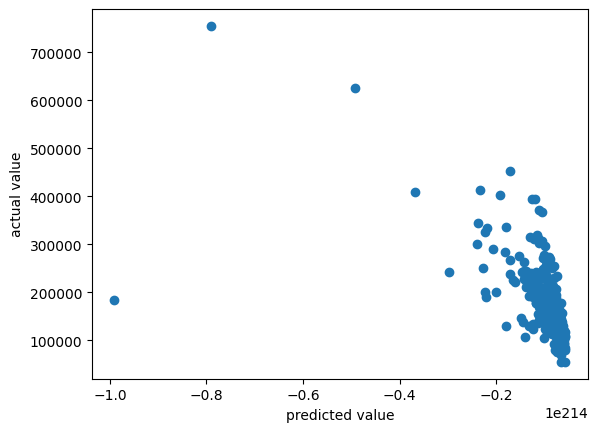

In [56]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
ax.scatter(ypreds, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

- From the above graph and y_pred values there is a difference in y_pred values from $ x^3 $ and $ x^2 $ and x as input features.

- In linear regression, the relationship between the input and output is represented as a straight line. Using the squared or cubic value of the feature as an input can change the relationship between the input and output to a non-linear relationship. In such scenario we use polynomial regression to better fit the data which is better in handling non-linear relationships between the dependent and independent variables.

## Problem 10: (Advanced Task) Derivation of Update formula

- The following is the formula for gradient descent 
$$
i_{j} = i_{j} - a\frac{1}{m}\sum_{i=1}^{m}[(h_{i}(x^{i}) - y^{i})x_{j}^{i}]
$$

- Please explain how the formula was derived:
- We will start with the following formula
 
$$
i_{j} = i_{j} - \frac{\partial{}}{\partial{i_{j}}}J(i)
$$
- To complete formula above J(i) = $$ J_{(i)} = \frac{1}{2m}\sum_{i=1}^{m}(h_{i}(x^{(i)}) - y^{(i)})^2 $$

- We need to find the derivative of J(i) with respect to (i)
- First we expand J(i):
$$
J_{(i)} = \frac{1}{2m}\sum_{i=1}^{m}(h_{i}(x^{(i)})^2 - 2h_{i}(x^{(i)})(y^{(i)}) + (y^{(i)})^2
$$

- Taking partial derivative of $J_{(i)}$ with respect to $i_{j}$



$$
\frac{\partial{}}{\partial{i_{j}}}J(i) = \frac{1}{2m}\sum_{i=1}^{m}2(h_{i}x^{(i)})x_{j}^{(i)} - (2y)^{(i)}(x_{j}^{(i)})
$$

- Simplifying further:

$$
\frac{\partial{}}{\partial{i_{j}}}J(i) = \frac{1}{m}\sum_{i=1}^{m}[(h_{i}(x^{(i)}) - y^{(i)})(x_{j}^{(i)})]
$$


- Substituting $\frac{\partial{}}{\partial{i_{j}}}J(i)$ in this formula $i_{j} = i_{j} - \frac{\partial{}}{\partial{i_{j}}}J(i)$ we get:

$$
i_{j} = i_{j} - a\frac{1}{m}\sum_{i=1}^{m}[(h_{i}(x^{i}) - y^{i})x_{j}^{i}]
$$

## Problem 11 (Advanced Task) Problem of local optimal solutions:
- Gradient descent generally suffers from the problem of local optima. However, with linear regression, you can always find the optimal solution if you continue learning. Please explain why using formulas and graphs.

<u>Solution:</u>

In linear regression its the objective function being optimized to find the global minimum.
The objective function $j_{(i)}$ is

$$
J_{(i)} = \frac{1}{2m}\sum_{i=1}^{m}(h_{i}(x^{(i)}) - y^{(i)})^2
$$
where:
$h_{(i)}$ : is the hypothesis function

$x^{(i)}$ : feature vector of i-th sample

$y^{(i)}$ : correct value of i-th sample

$m$ : number of training samples

The gradient descent algorithm can be used to find the minimum of this objective function. The update rule for each iteration is given by:

$$
i_{j} = i_{j} - a\frac{1}{m}\sum_{i=1}^{m}[(h_{i}(x^{i}) - y^{i})x_{j}^{i}]
$$
where:

$a$ :  is the learning rate

$x_{j}^{i}$ : is the jth feature value of ith training sample.

As the gradient descent algorithm moves towards the minimum of the objective function, it will eventually converge to the global minimum if the learning rate α is set appropriately.
- Therefore, when using linear regression with gradient descent, you can always find the optimal solution by continuing the learning process.

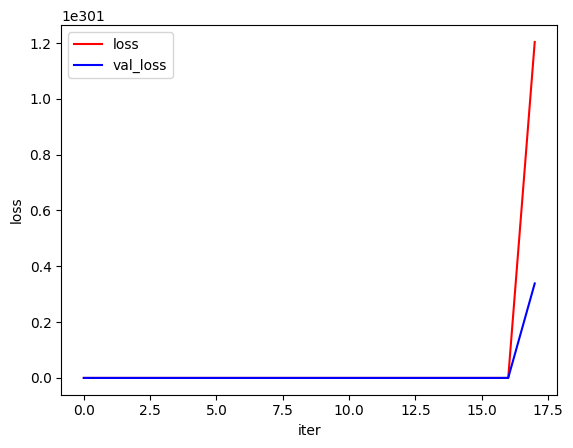

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss, color = 'red', label = 'loss')
plt.plot(slr.val_loss, color = 'blue', label = 'val_loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()

- From the above graph the loss decreses and tends towards zero